In [66]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping 

In [68]:
# 1. Загрузка и подготовка данных
print("Загрузка датасета CIFAR-10...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# Имена классов для CIFAR-10 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

y_train = y_train.squeeze()
y_test = y_test.squeeze()

Загрузка датасета CIFAR-10...


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


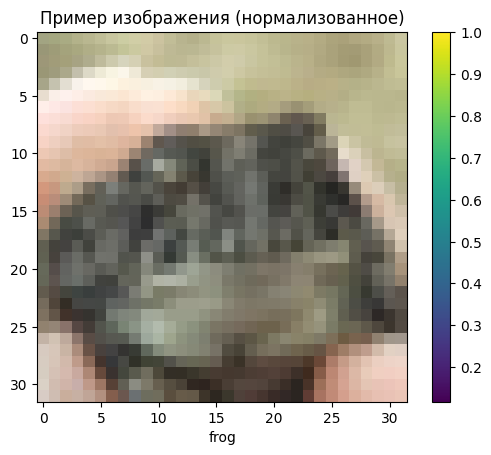

In [70]:
# 2. Нормализация данных
x_train = x_train / 255.0
x_test = x_test / 255.0

# Визуализация примера данных (после нормализации)
plt.figure()
plt.imshow(x_train[25])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_train[25]])
plt.title("Пример изображения (нормализованное)")
plt.show()

In [72]:
# 3. Создание модели нейронной сети
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')
])

In [74]:
# 4. Компиляция модели
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 3072)              0         
                                                                 
 dense_50 (Dense)            (None, 1024)              3146752   
                                                                 
 dropout_35 (Dropout)        (None, 1024)              0         
                                                                 
 dense_51 (Dense)            (None, 512)               524800    
                                                                 
 dropout_36 (Dropout)        (None, 512)               0         
                                                                 
 dense_52 (Dense)            (None, 256)               131328    
                                                                 
 dropout_37 (Dropout)        (None, 256)             

In [76]:
# 5. Обучение модели с EarlyStopping
print("\nОбучение модели с ранней остановкой...")
epochs_to_train = 45
batch_size_to_train = 64

early_stopping_cb = EarlyStopping(monitor='val_loss',
                                  patience=10,
                                  restore_best_weights=True,
                                  verbose=1,
                                  mode='min') # mode='min' явно указывает, что мы минимизируем val_loss

history = model.fit(x_train,
                    y_train,
                    epochs=epochs_to_train,
                    batch_size=batch_size_to_train,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping_cb])
print("Обучение модели завершено.")


Обучение модели с ранней остановкой...
Epoch 1/45
782/782 [==============================] - 10s 12ms/step - loss: 2.0439 - accuracy: 0.2440 - val_loss: 1.8468 - val_accuracy: 0.3320
Epoch 2/45
782/782 [==============================] - 10s 13ms/step - loss: 1.8800 - accuracy: 0.3164 - val_loss: 1.7672 - val_accuracy: 0.3709
Epoch 3/45
782/782 [==============================] - 10s 13ms/step - loss: 1.8258 - accuracy: 0.3376 - val_loss: 1.7175 - val_accuracy: 0.3924
Epoch 4/45
782/782 [==============================] - 10s 12ms/step - loss: 1.7902 - accuracy: 0.3548 - val_loss: 1.6664 - val_accuracy: 0.4180
Epoch 5/45
782/782 [==============================] - 9s 12ms/step - loss: 1.7549 - accuracy: 0.3685 - val_loss: 1.6569 - val_accuracy: 0.4253
Epoch 6/45
782/782 [==============================] - 9s 12ms/step - loss: 1.7354 - accuracy: 0.3707 - val_loss: 1.6583 - val_accuracy: 0.4246
Epoch 7/45
782/782 [==============================] - 9s 12ms/step - loss: 1.7191 - accuracy: 0.37

In [78]:
# 6. Оценка точности модели
print("\nОценка модели...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nПотери на тестовых данных:', test_loss)
print('Точность на тестовых данных:', test_acc)


Оценка модели...
313/313 - 1s - loss: 1.4692 - accuracy: 0.4885 - 871ms/epoch - 3ms/step

Потери на тестовых данных: 1.4691565036773682
Точность на тестовых данных: 0.4884999990463257


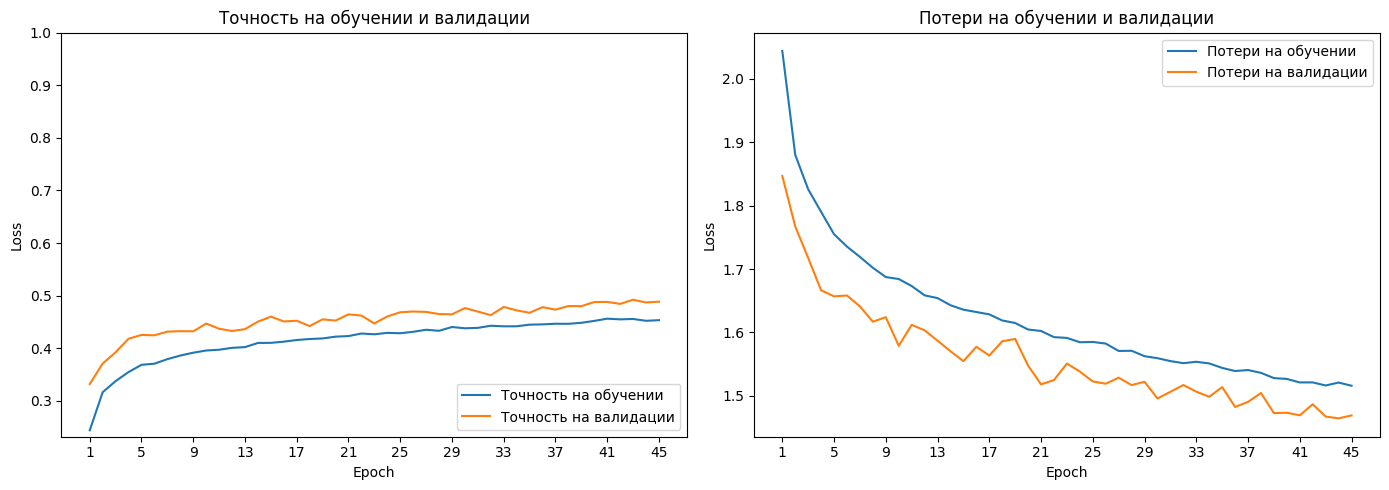

In [84]:
# 7. Визуализация истории обучения
plt.figure(figsize=(14, 5)) 
plt.subplot(1, 2, 1)
actual_epochs = len(history.history['accuracy'])
plt.plot(range(1, actual_epochs + 1), history.history['accuracy'], label='Точность на обучении')
plt.plot(range(1, actual_epochs + 1), history.history['val_accuracy'], label = 'Точность на валидации')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([min(min(history.history['accuracy']), min(history.history['val_accuracy']))*0.95 if actual_epochs > 0 else 0, 1])
plt.legend(loc='lower right')
plt.title('Точность на обучении и валидации')
plt.xticks(range(1, actual_epochs + 1, max(1, actual_epochs // 10)))

plt.subplot(1, 2, 2)
plt.plot(range(1, actual_epochs + 1), history.history['loss'], label='Потери на обучении')
plt.plot(range(1, actual_epochs + 1), history.history['val_loss'], label = 'Потери на валидации')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Потери на обучении и валидации')
plt.xticks(range(1, actual_epochs + 1, max(1, actual_epochs // 10)))
plt.tight_layout()
plt.show()


Выполнение предсказаний на тестовых данных...
313/313 [==============================] - 1s 3ms/step

Пример вероятностей предсказания для тестового изображения 1000:
[0.00535326 0.00457213 0.09835285 0.14043854 0.01265285 0.6369888
 0.00827138 0.07511196 0.0042983  0.0139599 ]
Предсказанный индекс класса: 5
Предсказанное имя класса: dog
Истинное имя класса: dog


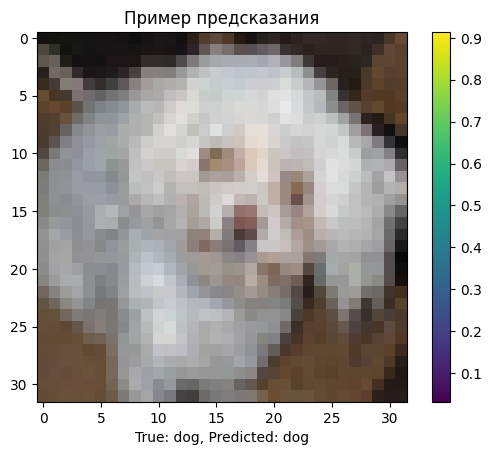

In [92]:
# 8. Предсказания 
print("\nВыполнение предсказаний на тестовых данных...")
predictions = model.predict(x_test)

# Пример одного предсказания
print("\nПример вероятностей предсказания для тестового изображения 1000:")
print(predictions[1000])
predicted_class_index = np.argmax(predictions[1000])
print(f"Предсказанный индекс класса: {predicted_class_index}")
print(f"Предсказанное имя класса: {class_names[predicted_class_index]}")
print(f"Истинное имя класса: {class_names[y_test[1000]]}")


plt.figure()
plt.imshow(x_test[1000])
plt.colorbar()
plt.grid(False)
plt.xlabel(f"True: {class_names[y_test[1000]]}, Predicted: {class_names[predicted_class_index]}")
plt.title("Пример предсказания")
plt.show()


Отображение нескольких предсказаний с гистограммами вероятностей...


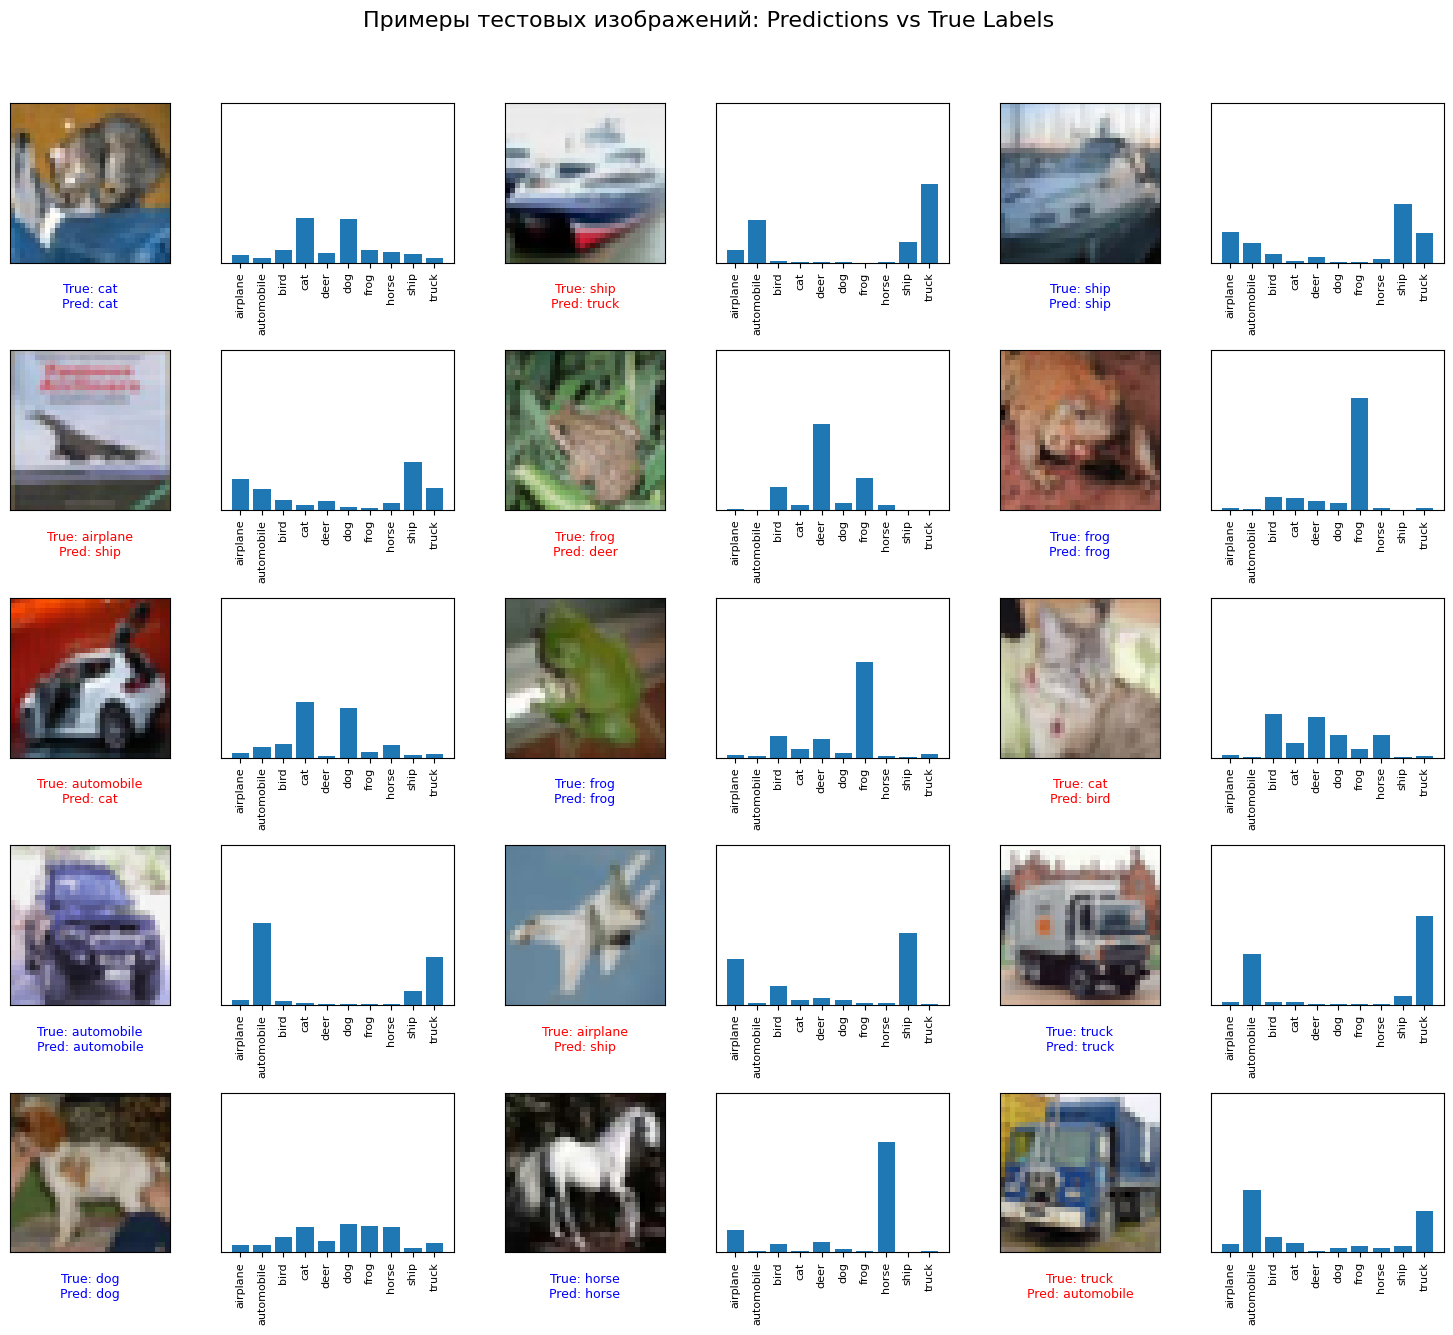

In [96]:
# 9.Отображение нескольких предсказаний
print("\nОтображение нескольких предсказаний с гистограммами вероятностей...")
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2.5 * num_cols, 2 * num_rows + 4)) 
plt.suptitle("Примеры тестовых изображений: Predictions vs True Labels", fontsize=16)
for i in range(num_images):
    idx_to_show = i
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(x_test[idx_to_show])
    plt.xticks([])
    plt.yticks([])
    true_label = class_names[y_test[idx_to_show]]
    predicted_label_idx = np.argmax(predictions[idx_to_show])
    predicted_label = class_names[predicted_label_idx]
    color = 'blue' if predicted_label_idx == y_test[idx_to_show] else 'red'
    plt.xlabel(f"\nTrue: {true_label}\nPred: {predicted_label}", color=color, fontsize=9)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(range(10), predictions[idx_to_show])
    plt.xticks(range(10), class_names, rotation=90, fontsize=8)
    plt.yticks([])
    plt.ylim([0, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()